In [2]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Loading the data
data_df = pd.read_csv('heart_v2.csv')

In [3]:
data_df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [5]:
data_df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [8]:
X = data_df.drop('heart disease',axis=1)
y = data_df['heart disease']

In [9]:
data_df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [7]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


In [8]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: heart disease, dtype: int64

In [9]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=42)
print(X_train.shape)
print(X_test.shape)

(189, 4)
(81, 4)


### Buidling the Decision Tree
- Using all default parameters except 'depth'


In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
dt = DecisionTreeClassifier(max_depth=3)

In [12]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
from sklearn.metrics import confusion_matrix,accuracy_score

In [14]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

In [15]:
print(accuracy_score(y_train,y_pred_train))

0.7407407407407407


In [16]:
confusion_matrix(y_train,y_pred_train)

array([[82, 19],
       [30, 58]], dtype=int64)

In [17]:
print("Test Set Performance")
print(accuracy_score(y_test,y_pred_test))

Test Set Performance
0.6049382716049383


In [18]:
confusion_matrix(y_test,y_pred_test)

array([[35, 14],
       [18, 14]], dtype=int64)

In [19]:
data_df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [11]:
X.head()

,age,sex,BP,cholestrol
0,70,1,130,322
1,67,0,115,564
2,57,1,124,261
3,64,1,128,263
4,74,0,120,269


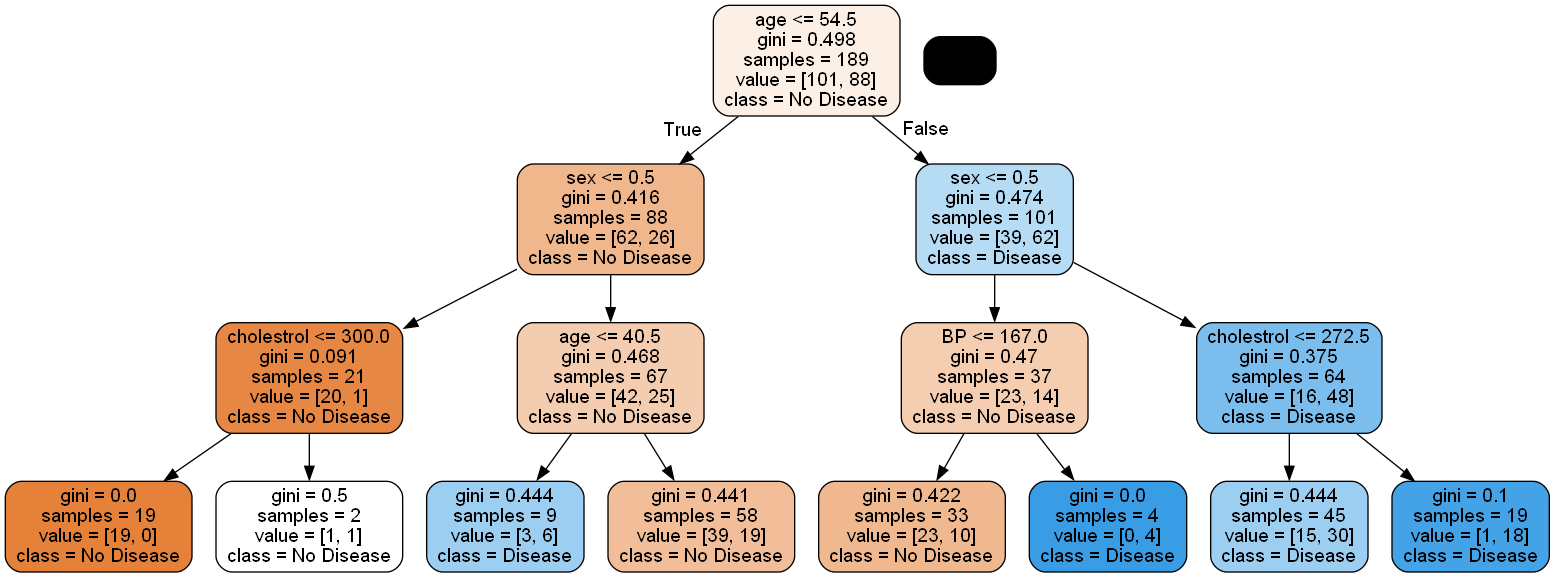

In [20]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

#### Creating helper functions to evaluate model performance and help plot the decision tree:

In [21]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['Disease', "No Disease"])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [61]:
def evaluate_model(dt_classifier):
    print('Train Accuracy:',accuracy_score(y_train,dt_classifier.predict(X_train)))
    print('Train Confussion Matrix:')
    print(confusion_matrix(y_train,dt_classifier.predict(X_train)))
    print("-"*50)
    print('Test Accuracy:',accuracy_score(y_test,dt_classifier.predict(X_test)))
    print('Test Confussion Matrix:')
    print(confusion_matrix(y_test,dt_classifier.predict(X_test)))  

### Without setting any hyper-parameters:

In [62]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

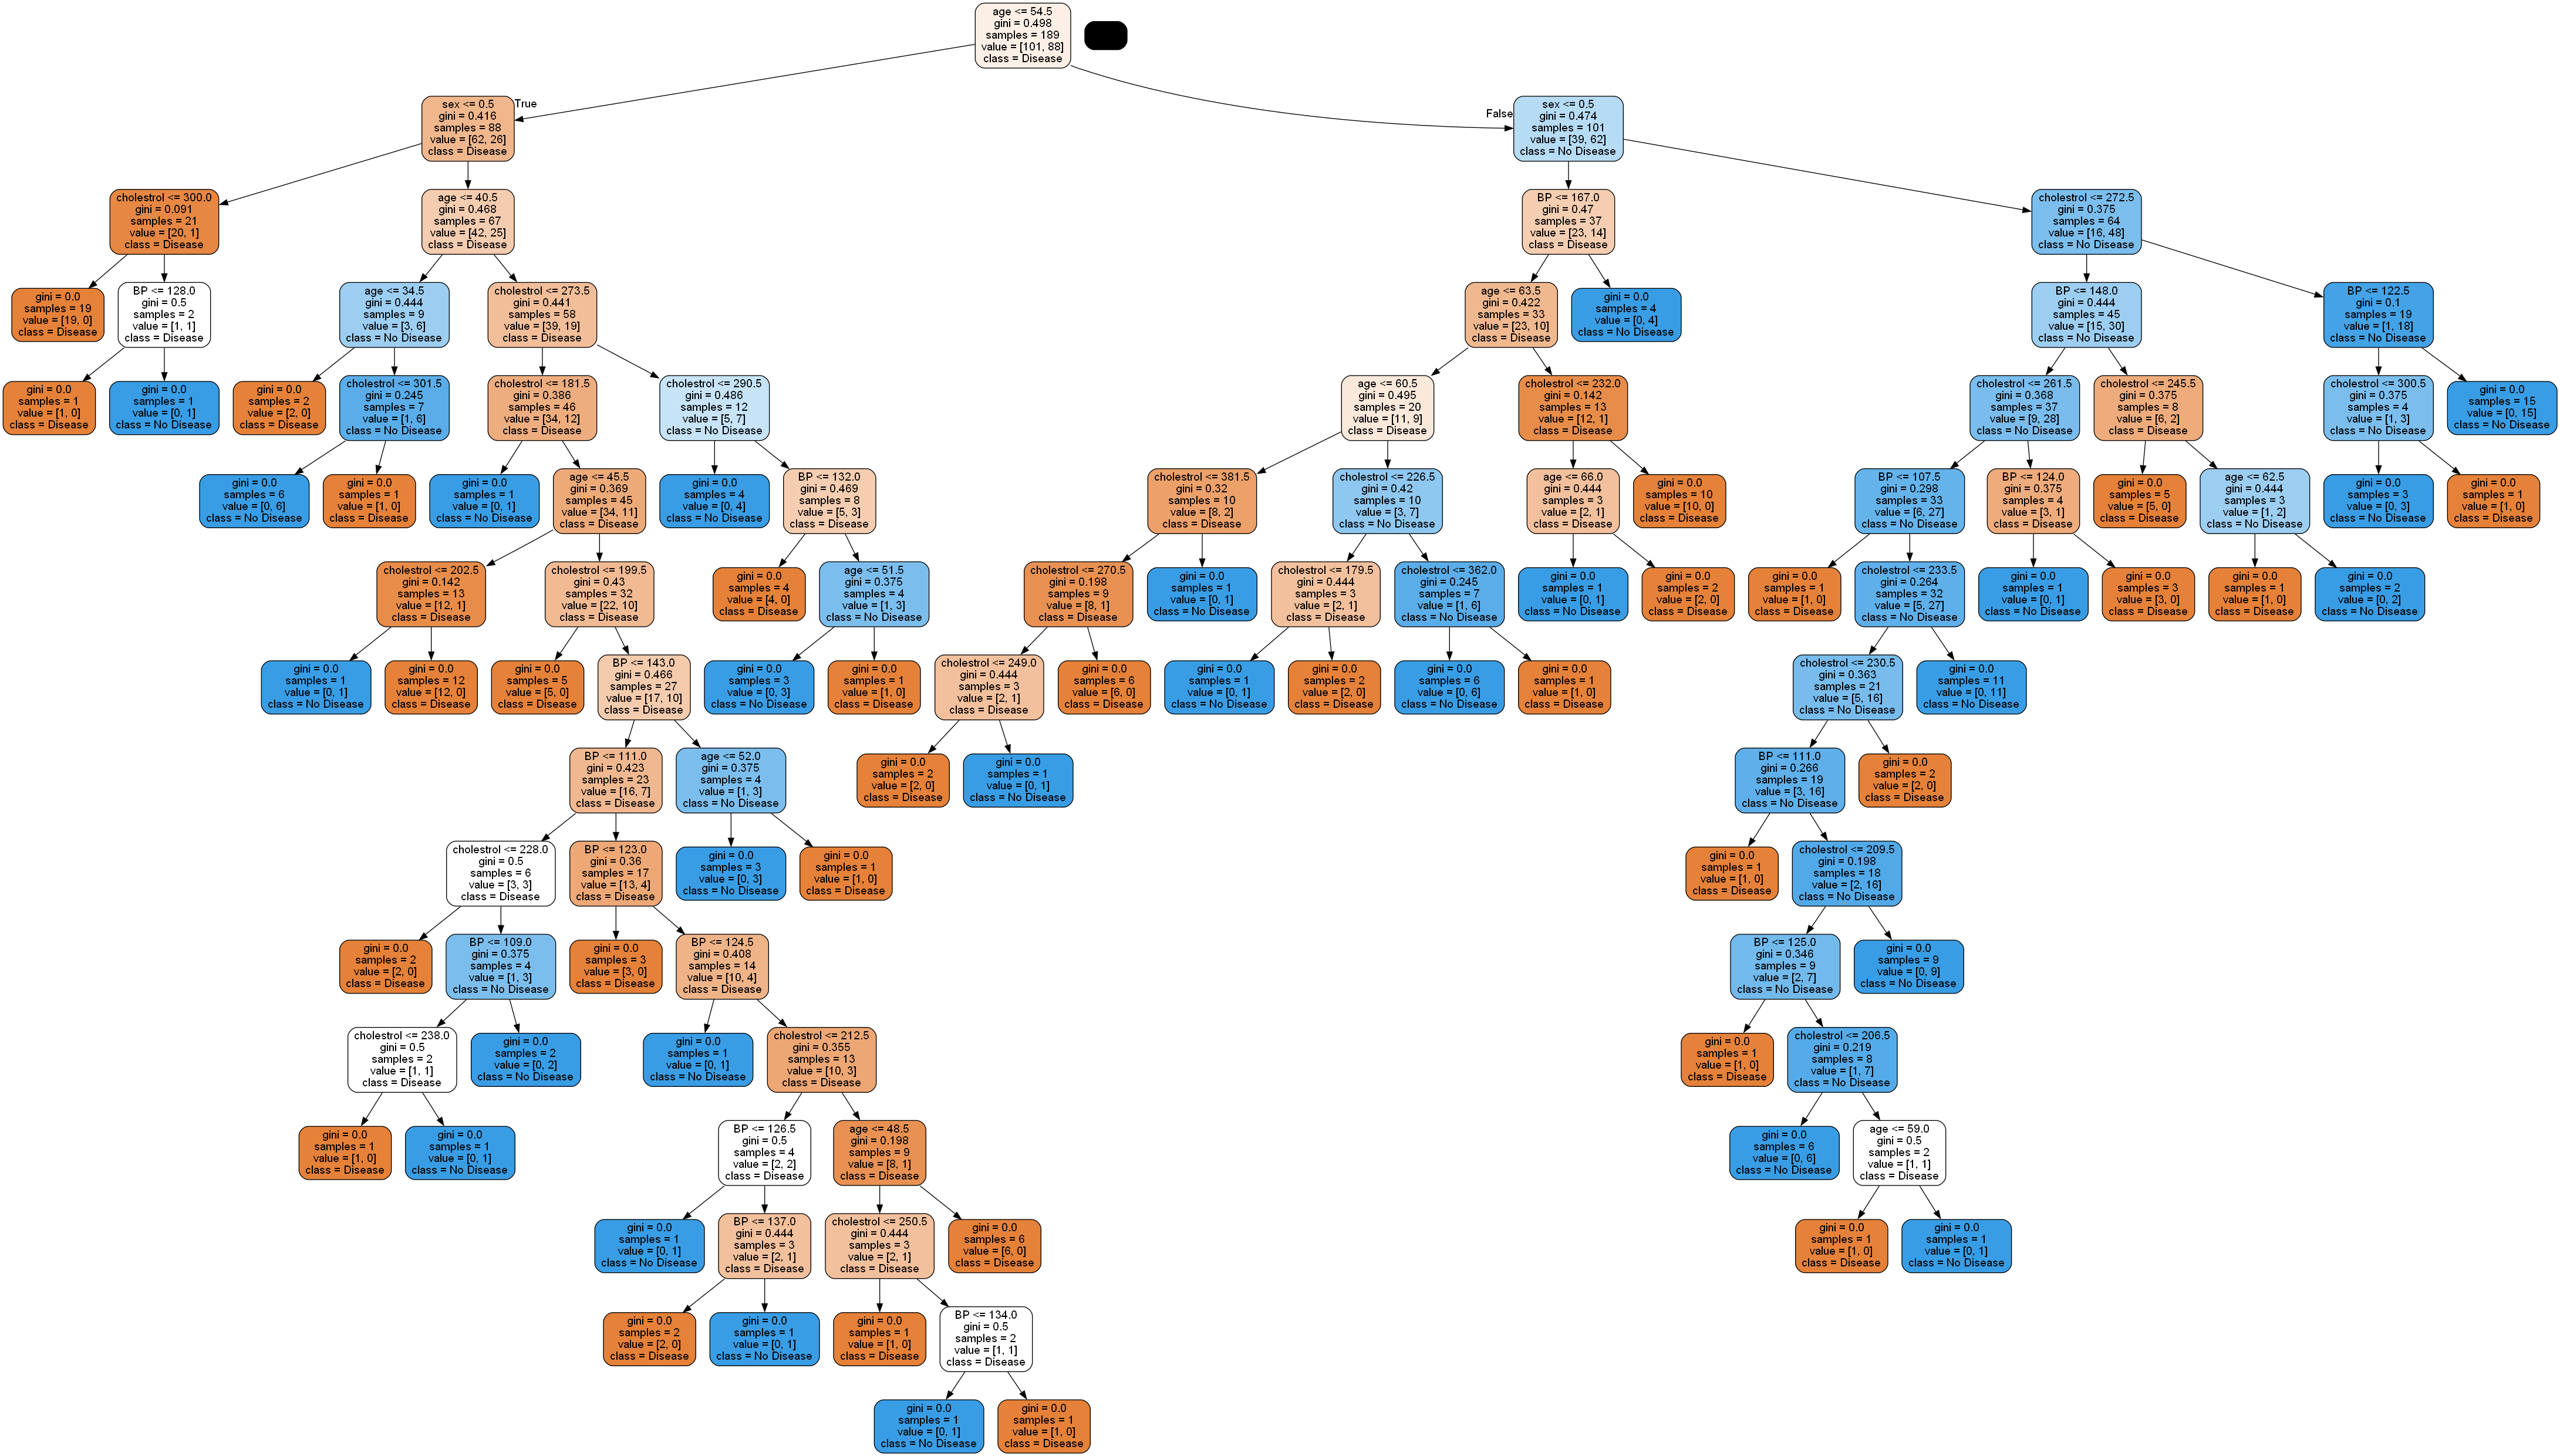

In [63]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [64]:
evaluate_model(dt_default)

Train Accuracy: 1.0
Train Confussion Matrix:
[[101   0]
 [  0  88]]
--------------------------------------------------
Test Accuracy: 0.6296296296296297
Test Confussion Matrix:
[[31 18]
 [12 20]]


### Controlling the depth of the tree:

In [65]:
#?DecisionTreeClassifier

In [66]:
dt_depth = DecisionTreeClassifier(max_depth=3)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

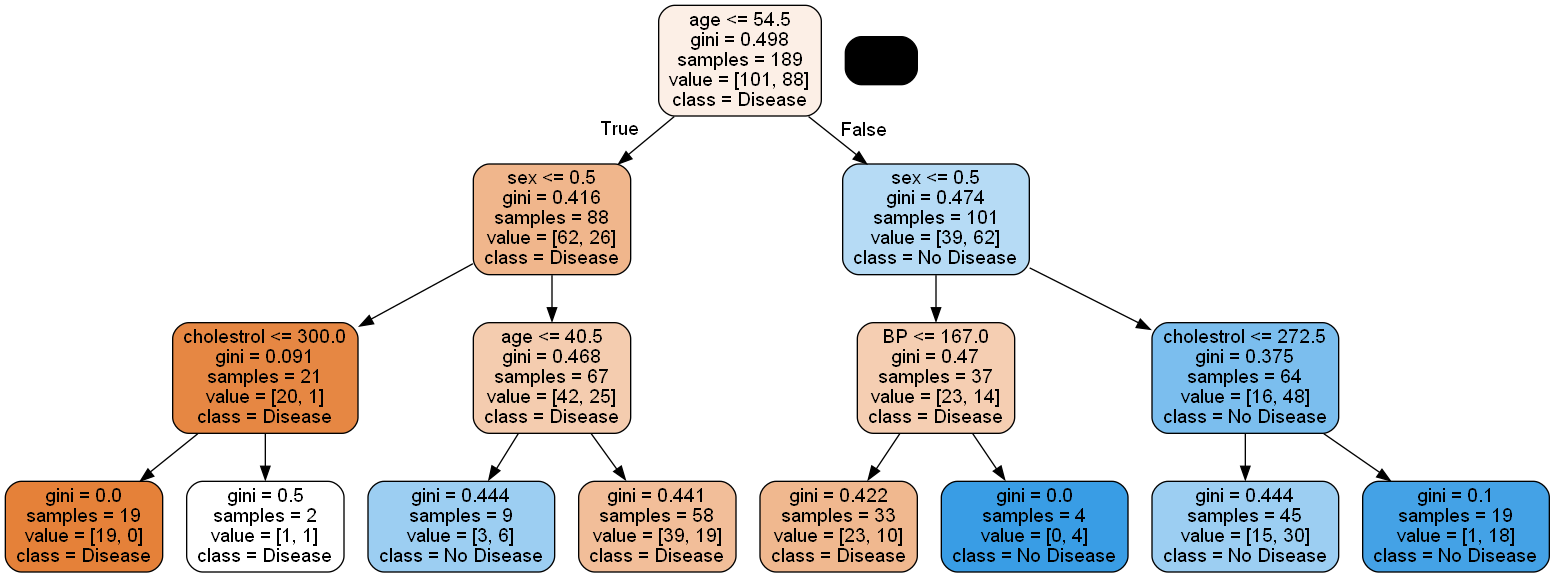

In [67]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [68]:
evaluate_model(dt_depth)

Train Accuracy: 0.7407407407407407
Train Confussion Matrix:
[[82 19]
 [30 58]]
--------------------------------------------------
Test Accuracy: 0.6049382716049383
Test Confussion Matrix:
[[35 14]
 [18 14]]


### Specifying minimum samples before split:

In [69]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_split=20, random_state=42)

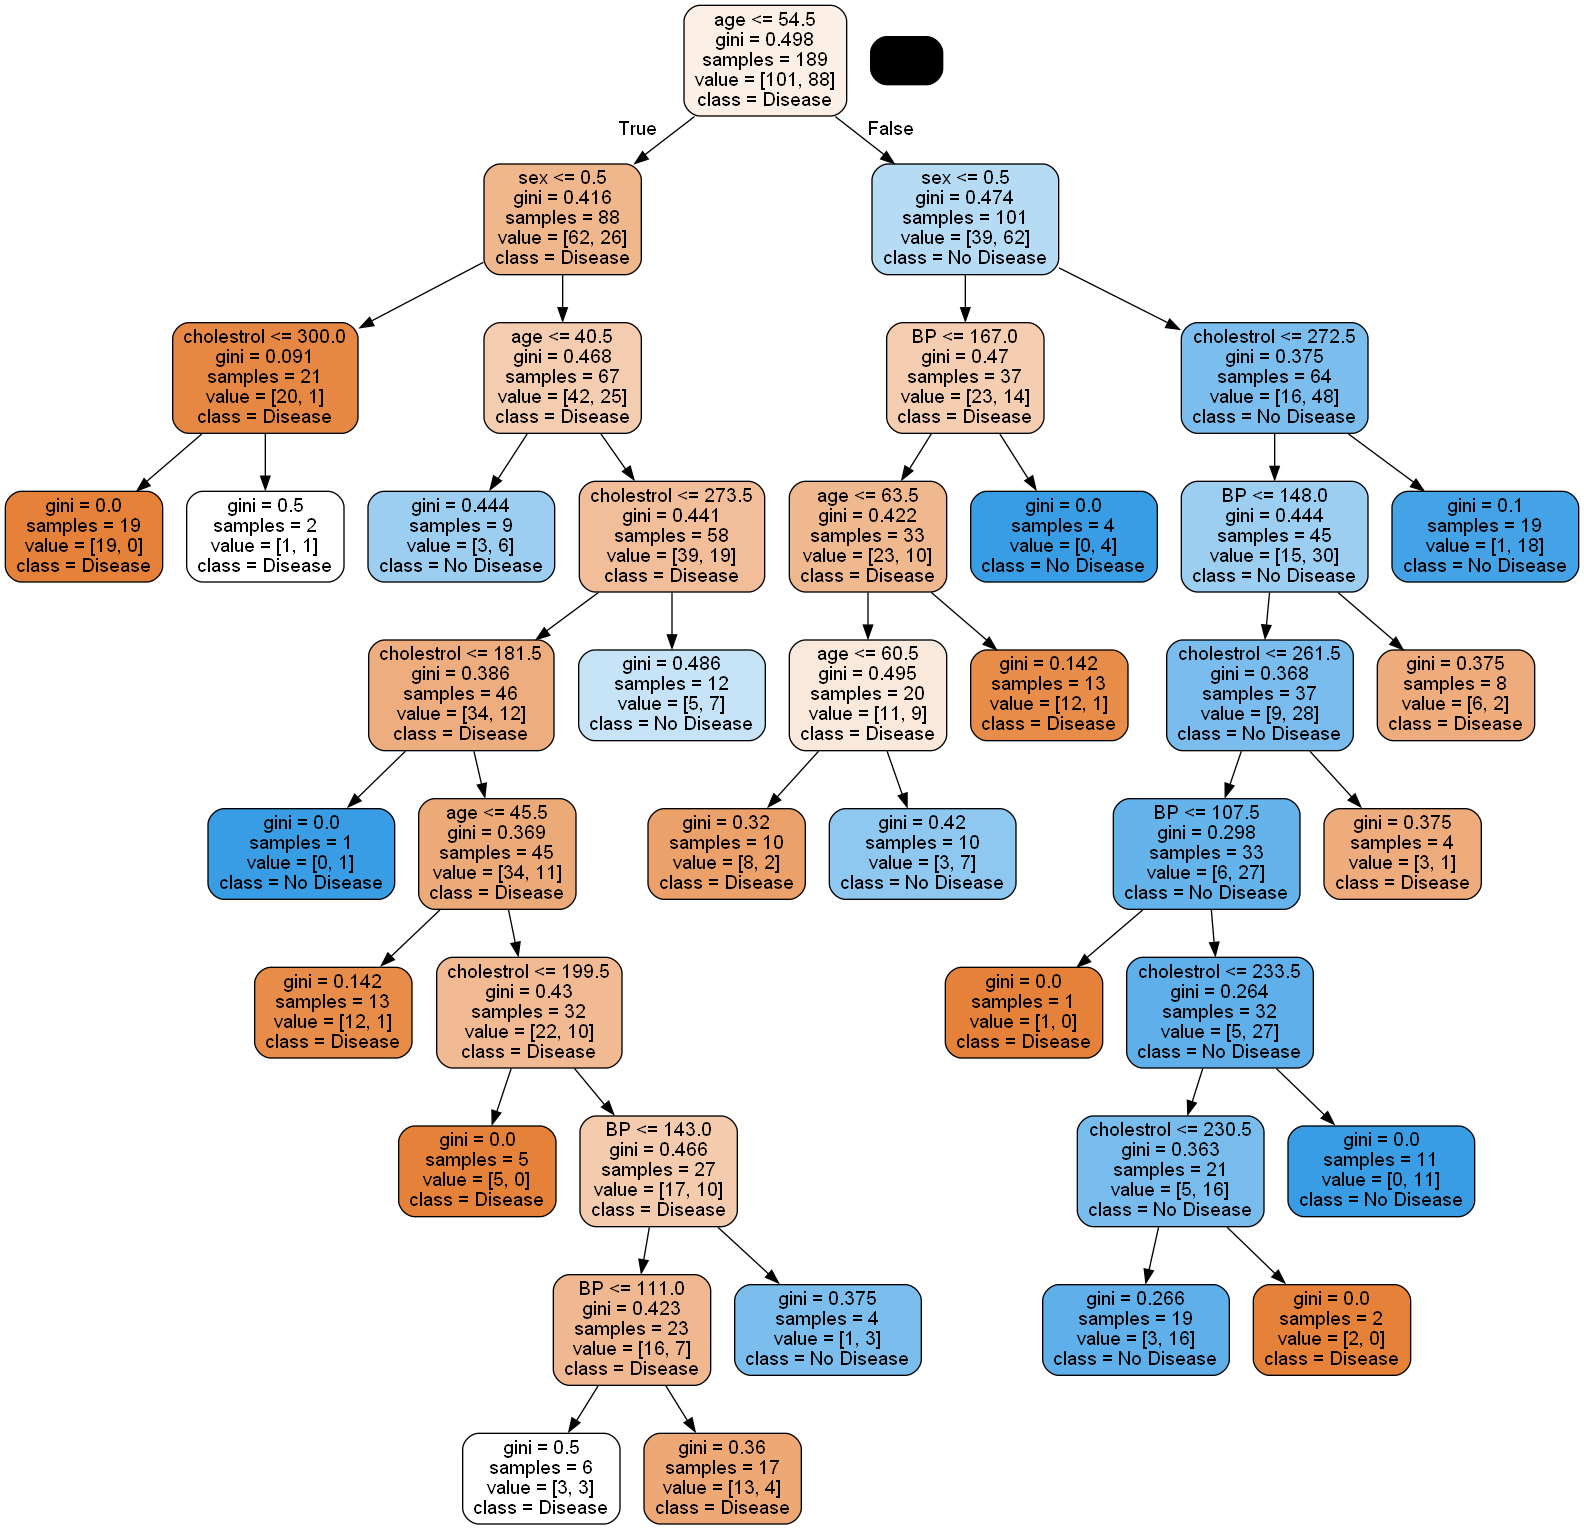

In [70]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [71]:
evaluate_model(dt_min_split)

Train Accuracy: 0.8359788359788359
Train Confussion Matrix:
[[85 16]
 [15 73]]
--------------------------------------------------
Test Accuracy: 0.6419753086419753
Test Confussion Matrix:
[[32 17]
 [12 20]]


### Specifying minimum samples in leaf node:

In [72]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20, random_state=42)
dt_min_leaf.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=20, random_state=42)

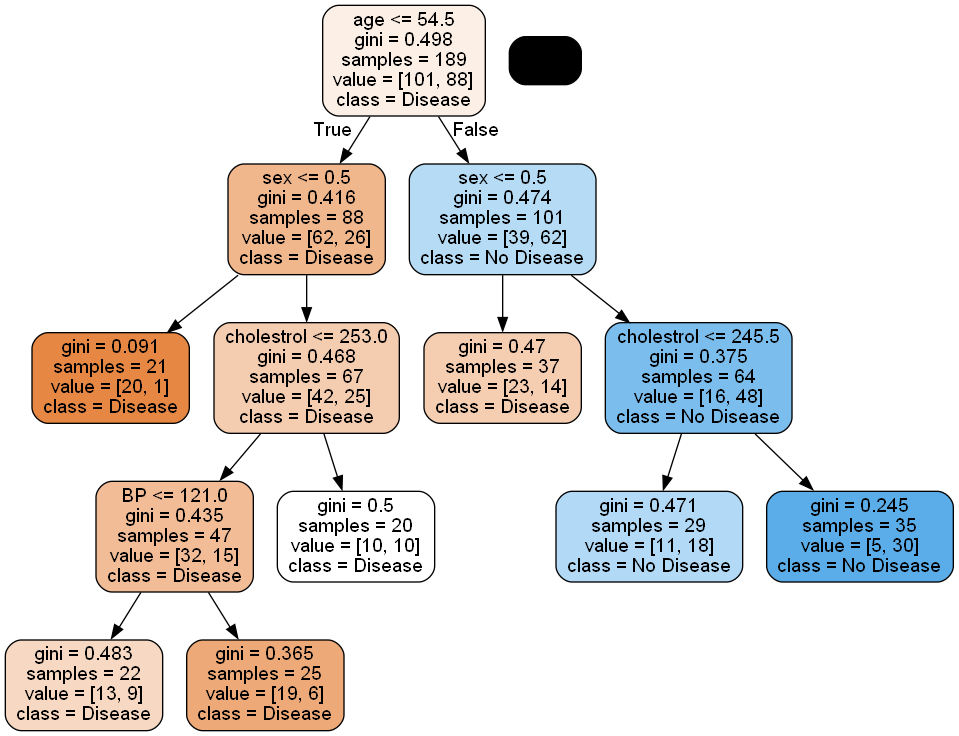

In [73]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [74]:
evaluate_model(dt_min_leaf)

Train Accuracy: 0.7037037037037037
Train Confussion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy: 0.6419753086419753
Test Confussion Matrix:
[[38 11]
 [18 14]]


### Using Entropy instead of Gini:

In [75]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy")
dt_min_leaf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=20,
                       random_state=42)

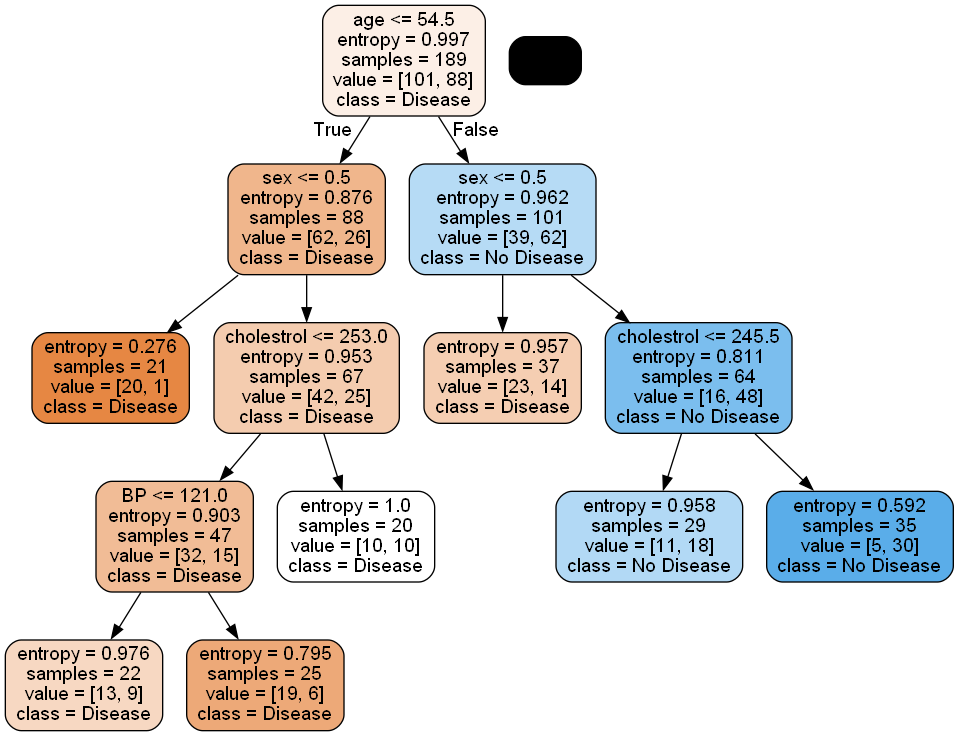

In [76]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [77]:
evaluate_model(dt_min_leaf_entropy)

Train Accuracy: 0.7037037037037037
Train Confussion Matrix:
[[85 16]
 [40 48]]
--------------------------------------------------
Test Accuracy: 0.6419753086419753
Test Confussion Matrix:
[[38 11]
 [18 14]]


### Hyper-parameter tuning:

In [78]:
dt = DecisionTreeClassifier(random_state=42)

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [81]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [82]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
Wall time: 4.31 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [83]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007736,0.002849,0.002986,1.222184e-03,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
1,0.005735,0.003622,0.002742,8.263829e-04,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.708333,0.744681,0.617021,0.531915,0.650488,0.082762,17
2,0.003740,0.000432,0.001994,7.420718e-07,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.687500,0.744681,0.617021,0.531915,0.645279,0.079551,20
3,0.003491,0.000499,0.001995,6.822063e-07,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
4,0.003491,0.000498,0.001995,7.794319e-07,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.541667,0.531915,0.531915,0.531915,0.534353,0.004223,41


In [84]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.003237,0.000426,0.003246,1.301615e-03,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.604167,0.765957,0.617021,0.680851,0.666999,0.064090,1
5,0.003740,0.000431,0.002494,4.994325e-04,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.625000,0.744681,0.595745,0.659574,0.656250,0.055831,2
3,0.003491,0.000499,0.001995,6.822063e-07,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
8,0.003740,0.000431,0.001995,6.165552e-07,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3
13,0.002990,0.000004,0.002250,1.089954e-03,gini,5,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.666667,0.680851,0.574468,0.702128,0.656028,0.048751,3


In [85]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [86]:
dt_best = grid_search.best_estimator_

In [87]:
type(dt_best)

sklearn.tree._classes.DecisionTreeClassifier

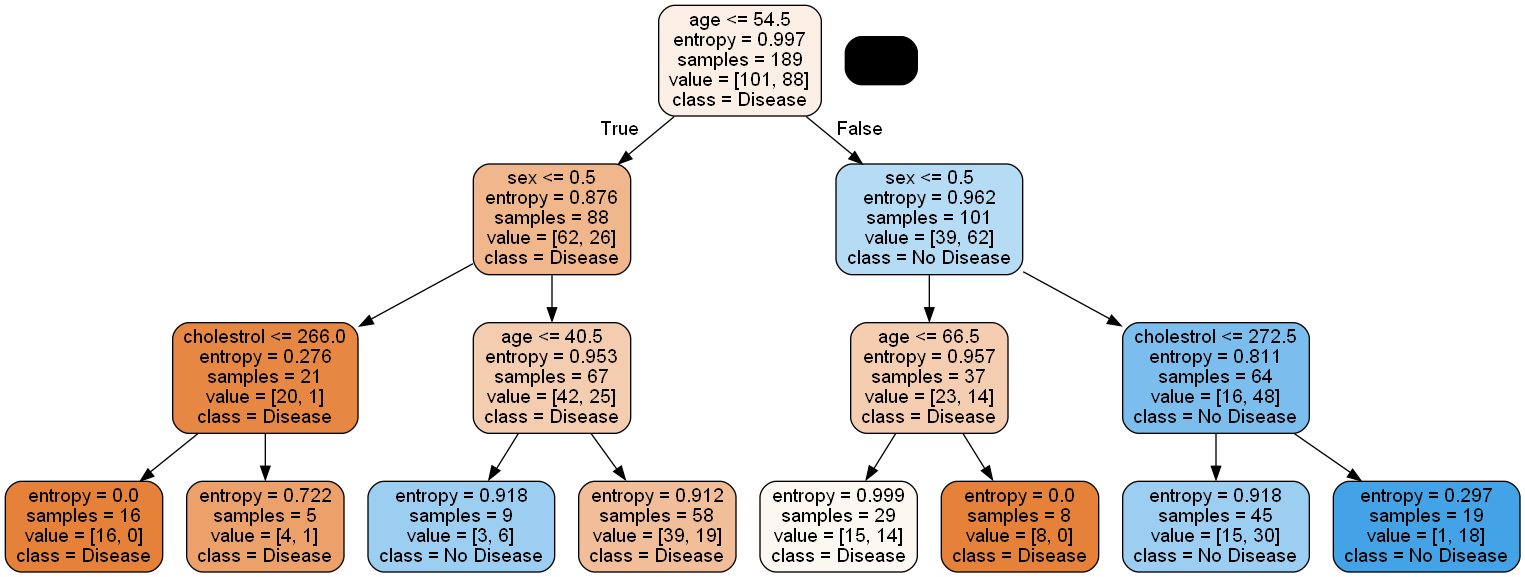

In [88]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())

In [89]:
evaluate_model(dt_best)

Train Accuracy: 0.7195767195767195
Train Confussion Matrix:
[[82 19]
 [34 54]]
--------------------------------------------------
Test Accuracy: 0.6172839506172839
Test Confussion Matrix:
[[36 13]
 [18 14]]
